In [194]:
 import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [195]:
movies_df = pd.read_csv('machine learning.csv')
movies_df.head()

,imdb_title_id,original_title,year,genre,country,production_company,duration,votes,budget,usa_gross_income,worldwide_gross_income,rating,metascore
0,tt7374952,Chicano,2018,Drama,USA,Films,108,1016,8000000,1400603,1404646,5.3,46
1,tt0238247,Army,2000,Drama,USA,Films,108,1021,300000,2637726,2637726,6.4,38
2,tt0462579,Treatment,2006,Romance,USA,Shrinkwrap,86,1037,900000,83354,83354,5.8,54
3,tt2094890,George,2013,Drama,USA,Productions,107,1037,750000,157937,157937,6.4,77
4,tt6512428,Indivisible,2018,War,USA,Films,119,1038,2700000,3511417,3589633,5.8,53


In [208]:
X = movies_df[["duration", "votes", "worldwide_gross_income", "metascore", "budget"]]
y = movies_df["rating"].values.reshape(-1, 1)
print(X.shape, y.shape)


(4031, 5) (4031, 1)


In [209]:
model = LinearRegression()
model.fit(X, y)
predicted = model.predict(X)

mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.3735508539574746
R-squared (R2 ): 0.6209462957405374


In [210]:
model.score(X, y)

0.6209462957405374

In [211]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,duration,votes,worldwide_gross_income,metascore,budget
2086,86,47108,2437000,75,777000
1422,118,25417,201890,62,6000000
296,104,4626,10372291,34,90000000
2401,112,62370,44567606,62,10000000
507,105,7718,342202,60,4000000


In [212]:
 model.fit(X_train, y_train)

LinearRegression()

In [213]:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

In [214]:
 model.score(X_test, y_test)

0.6428990143570368

In [215]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6134451034640582
Testing Score: 0.6428990143570368


In [216]:
 from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.34650366918673914, R2: 0.6428990143570368


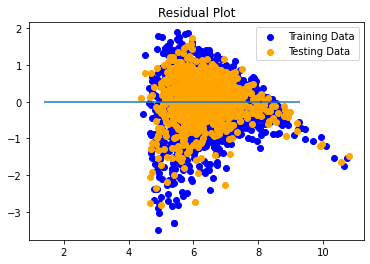

In [217]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

plt.scatter(train_pred, y_train - train_pred, c="blue", label="Training Data")
plt.scatter(test_pred, y_test - test_pred, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot");

In [218]:
#Duration, no.of votes, profit, metascore, budget

pred_data = [[180, 300000, 20000000, 100, 10000000]]
testing_pred = model.predict(pred_data)
testing_pred 

array([[8.92170819]])